In [1]:
from tensorly.metrics.regression import RMSE
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from nn_parafac_normalization_comparison import *

#parameters
init='svd'
svd='numpy_svd'
rank=10

#hyperspectral image
mat = scipy.io.loadmat('/home/ctuna/tensoptly/benchmark_data/Hyperspectral/Indian_pines_corrected.mat')
image=mat['indian_pines_corrected']

tensor=tl.tensor(image,dtype='float')

1. Method from PR
2. Inner loop normalization with last factor normalization after inner loop
3. Normalization at the end
4. 2 and 3 together

In [2]:
#normalized improved nonnegative parafac result
tic = time.time()
tensornorm1, errorsnorm1 = non_negative_parafac_normalize_1(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm1, factorsnorm1 = tensornorm1
cp_reconstructionnorm1 = tl.cp_to_tensor((weightsnorm1, factorsnorm1))
time_cp1 = time.time() - tic

#normalized improved nonnegative parafac result
tic = time.time()
tensornorm2, errorsnorm2 = non_negative_parafac_normalize_2(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm2, factorsnorm2 = tensornorm2
cp_reconstructionnorm2 = tl.cp_to_tensor((weightsnorm2, factorsnorm2))
time_cp2 = time.time() - tic

#normalized improved nonnegative parafac result
tic = time.time()
tensornorm3, errorsnorm3 = non_negative_parafac_normalize_3(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm3, factorsnorm3 = tensornorm3
cp_reconstructionnorm3 = tl.cp_to_tensor((weightsnorm3, factorsnorm3))
time_cp3 = time.time() - tic

#normalized improved nonnegative parafac result
tic = time.time()
tensornorm4, errorsnorm4 = non_negative_parafac_normalize_4(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True, n_iter_max=100)
weightsnorm4, factorsnorm4 = tensornorm4
cp_reconstructionnorm4 = tl.cp_to_tensor((weightsnorm4, factorsnorm4))
time_cp4 = time.time() - tic

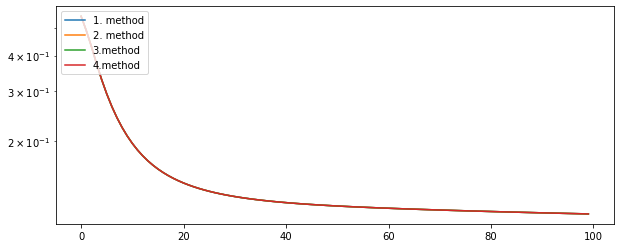

In [3]:
each_iteration(errorsnorm1, errorsnorm2, errorsnorm3, errorsnorm4)

In [4]:
print(weightsnorm1[:4])
print(weightsnorm2[:4])
print(weightsnorm3[:4])
print(weightsnorm4[:4])

[1883382.11468306 2079359.03011194 1045654.10264888  370151.78023748]
[1883382.11468329 2079359.03011192 1045654.10264896  370151.78023748]
[1883382.11468322 2079359.03011192 1045654.10264893  370151.78023749]
[1883382.11468336 2079359.03011191 1045654.10264894  370151.78023751]


In [5]:
print(tl.mean(factorsnorm1[0]), tl.mean(factorsnorm1[1]), tl.mean(factorsnorm1[2]))
print(tl.mean(factorsnorm2[0]), tl.mean(factorsnorm2[1]), tl.mean(factorsnorm2[2]))
print(tl.mean(factorsnorm3[0]), tl.mean(factorsnorm3[1]), tl.mean(factorsnorm3[2]))
print(tl.mean(factorsnorm4[0]), tl.mean(factorsnorm4[1]), tl.mean(factorsnorm4[2]))

0.07533330636454574 0.07644758324724353 0.05380005590935434
0.07533330636454613 0.0764475832472443 0.05380005590935381
0.07533330636454619 0.07644758324724396 0.05380005590935362
0.07533330636454635 0.07644758324724467 0.05380005590935304


In [6]:
print(RMSE(tensor,cp_reconstructionnorm1))
print(RMSE(tensor,cp_reconstructionnorm2))
print(RMSE(tensor,cp_reconstructionnorm3))
print(RMSE(tensor,cp_reconstructionnorm4))

341.6406575764499
341.6406575764525
341.6406575764509
341.6406575764522


In [7]:
print(str(time_cp1))
print(str(time_cp2))
print(str(time_cp3))
print(str(time_cp4))

47.713401556015015
50.89780402183533
53.582727909088135
51.343518018722534
